## Numerical Partial Differential Equations Homework 2 

(1) Exericse 5.1 Use Program 5.1 to explore the effect on the parameter $\alpha$ in Robin boundary conditions. Show that as $\alpha \rightarrow \infty$ that the solution tends to the solution of the Dirichlet problem. More precisely, compute the norm of the difference of the Robin solution from the exact solution for the Dirichlet problem for large values of $\alpha$. What happens when $\alpha \rightarrow$ 0? Explain 

In [1]:
from dolfin import * 
from math import pi as pi 
from math import log10 as log
from fenics import *
import numpy as np 
import matplotlib.pyplot as plt
#Creating set of alpha

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)
alpha = [10**-9,10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,
         1,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9]
graphvec1 = [] 
graphvec2 = []
graphvec3 = []
graphvec4 = [] 
for alpha in alpha:
# Define variational problem

    u = TrialFunction(V)
    v = TestFunction(V)
    f = Expression("(sin(3.141592*x[0]))*(sin(3.141592*x[1]))",degree=1)
    Exact = Expression("-(sin(pi*x[0]))*(sin(pi*x[1])/(2*pi*pi))",degree=1)
    a = inner(grad(u), grad(v))*dx + alpha*u*v*ds
    L = (2*3.141592*3.141592)*f*v*dx 

# Compute solution
    u = Function(V)
    solve(a == L, u)
    l2err = errornorm(Exact,u,norm_type='l2',degree_rise=3) 
    #print('The L2 Error Between the Robin Solution and the True Dirichlet Solution for alpha =',alpha, 'is', l2err)
    graphvec1 = np.append(graphvec1, log(alpha))
    graphvec2 = np.append(graphvec2, log(l2err))
    print(log(l2err))
    #graphvec3 = np.append(graphvec3, alpha)
    #graphvec4 = np.append(graphvec4, l2err)
    
# Plot solution
#plot(u, interactive=True)
plt.plot(graphvec1,graphvec2,'o')
locs, labels = plt.xticks()
labels = plt.xticks(np.arange(-9, 9, step=3))
locs, labels = plt.yticks()
plt.title('log-log (base 10) plot of alpha vs l2err')
plt.xlabel('log(alpha)')
plt.ylabel('log(l2err)')
plt.show()
#locs, labels = plt.xticks()
#labels = xticks(np.arange(0, 10, step=1))

9.30032652375203
8.3003315853362
7.300331853497216
6.300332059877083
5.3003330398535455
4.300342763421428
3.3004399768786206
2.3014112357212255
1.311036248561804
0.39879835091535587
-0.14143707041488277
-0.2649286122012638
-0.2795672754721309
-0.2810602707207259
-0.28120987025171756
-0.281224833215364
-0.2812263295418453
-0.28122647917479504
-0.2812264941380928


<Figure size 640x480 with 1 Axes>

(2) Exercise 7.1 Let $\epsilon > 0 $. Consider the problem 
$$ -\epsilon \Delta u_e + u_e = f \hspace{1mm} \textit{in} \hspace{1mm}\Omega = [0,1]^2 $$
together with the homogeneous Dirichlet conditions on all of $\partial \Omega$, where $f(x,y) = sin ( \pi x )sin ( \pi y )$, which does satisfy the boundary conditions (2.2), See what happens for small $\epsilon$. Does $u_e \rightarrow f$? Is there a boundary layer? If the homogeneous boundary conditions hold on only a part $\Gamma$ of the boundary, is there a boundary layer away from $\Gamma$? \\


In [ ]:
from math import pi as pi 
set_log_active(False)
from math import log10 as log
from fenics import *
import numpy as np 
import matplotlib.pyplot as plt
#Creating set of alpha

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)
alpha = [10**-9,10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,
         1,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9]
graphvec1 = [] 
graphvec2 = []
graphvec3 = []
graphvec4 = [] 
for alpha in alpha:
# Define variational problem

    u = TrialFunction(V)
    v = TestFunction(V)
    f = Expression("(sin(3.141592*x[0]))*(sin(3.141592*x[1]))",degree=1)
    Exact = Expression("-(sin(pi*x[0]))*(sin(pi*x[1])/(2*pi*pi))",degree=1)
    a = inner(grad(u), grad(v))*dx + alpha*u*v*ds
    L = (2*3.141592*3.141592)*f*v*dx 

# Compute solution
    u = Function(V)
    solve(a == L, u)
    l2err = errornorm(Exact,u,norm_type='l2',degree_rise=3) 
    #print('The L2 Error Between the Robin Solution and the True Dirichlet Solution for alpha =',alpha, 'is', l2err)
    graphvec1 = np.append(graphvec1, log(alpha))
    graphvec2 = np.append(graphvec2, log(l2err))
    print(log(l2err))
    #graphvec3 = np.append(graphvec3, alpha)
    #graphvec4 = np.append(graphvec4, l2err)
    
# Plot solution
#plot(u, interactive=True)
plt.plot(graphvec1,graphvec2,'o')
locs, labels = plt.xticks()
labels = plt.xticks(np.arange(-9, 9, step=3))
locs, labels = plt.yticks()
plt.title('log-log (base 10) plot of alpha vs l2err')
plt.xlabel('log(alpha)')
plt.ylabel('log(l2err)')
plt.show()
#locs, labels = plt.xticks()
#labels = xticks(np.arange(0, 10, step=1))

(3) Exercise 7.3 Let $\epsilon > 0 $. Consider the problem 
$$ -\epsilon \Delta u_e + u_e = f \hspace{1mm} \textit{in} \hspace{1mm}\Omega = [0,1]^2 $$
together with the homogeneous Dirichlet conditions on all of $\partial \Omega$, where $f(x,y) = 1$, which does not satisfy the boundary conditions (2.2). See what happens for small $\epsilon$. Does $u_e \rightarrow f$? In what norm(s)? Is there a boundary layer? Compare the data in Table 7.4 and experiment with other values of $\epsilon$. Note that the best results require a large number of nodes to resolve the boundary layer, but among the different choices (linear, quadratics, and so forth), the results are about the same and take about the same time to compute.e In particular, using a high-order polynomial does not provide particular benefit in this case.

In [ ]:
"""This demo program solves a PDE

    - div grad u(x, y) + K(x,y) u(x,y) = f

on the unit square with Dirichlet boundary conditions given by u=0 
on the boundary of the square, whose solution is related to the
asymptotic van der Waals interaction energy for two hydrogen atoms.
Computation is truncated to a domain of length "ell"
"""

from dolfin import *
import sys
from timeit import default_timer as timer

from math import log2 as log2
from math import pi as mypi 

parameters["form_compiler"]["quadrature_degree"] = 12

startime=timer()
meshvec = [16,32,64,128,256]
pdeg=1
ell=15.0
myeps=1e-9
pmer = 1.0

for meshsize in meshvec:
  # Create mesh and define function space
  mesh = UnitSquareMesh(meshsize, meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define boundary condition
  u0 = Constant(0.0)
  bc = DirichletBC(V, u0, DomainBoundary())
  
  # Define variational problem
  u = TrialFunction(V)
  v = TestFunction(V)
  f  = Expression("(sin(3.141592*x[0]))*(sin(3.141592*x[1]))/myeps",degree=1)
  kay = 1/myeps
  a = (inner(grad(u), grad(v))+kay*u*v)*dx
  m = u*v*dx
  RHS = f*v*dx 
  
  # Compute solution
  u = Function(V)
  solve(a == RHS, u, bc)
  aftersolveT=timer()
  mfu= (16.0*pow(mypi,2)/3.0)*assemble(u*f*dx)
  mer=mfu-6.49902670540
  totime=aftersolveT-startime
  erate = log2(abs(pmer/mer))
  print("deg:",pdeg," , meshno:",meshsize,", error: %.2e"%mer,", rate: %.2e"%erate,", eps: %.2e"%myeps,", L:%.1f"%ell,", time:%.3f"%totime)
  pmer = mer
  
 
  


(4) Exercise 9.2 :  Another method for solving nonlinear equations $f(u) = 0$ is the fixed point iteration 
$$ u \leftarrow u \pm \epsilon f(u)$$
for some parameter $\epsilon$. Give an implementation of the Jeffrey-Hamel problem and compare it with Newtons method.

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


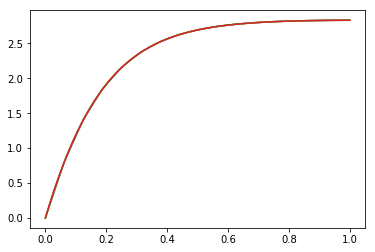

In [2]:
"""This program solves Jeffrey-Hamel problem

    - u'' + 4u + 6u^2 = C

on the unit interval with boundary conditions given by

    u(0) = 0
du/dn(1) = 0
"""

from dolfin import *
import math
import matplotlib.pyplot as plt

meshvec = [16,32,64,256]
pdeg    = 1
see     = 60 ## go up to at least 6000000

u0 = Expression("0.0",degree=pdeg)
for meshsize in meshvec:
  # Create mesh and define function space
  mesh = UnitIntervalMesh(meshsize)
  V = FunctionSpace(mesh, "Lagrange", pdeg)
  
  # Define Dirichlet boundary (x = 0 or x = 1)
  def boundary(x):
      return x[0] < DOLFIN_EPS 
  
  # Define boundary condition
  bc = DirichletBC(V, u0, boundary)
  
  # Define variational problem
  u = Function(V)
  v = TestFunction(V)
  f = Expression("C",C=see,degree=pdeg)
  F = inner(grad(u), grad(v))*dx + 4.0*u*v*dx + 6.0*u*u*v*dx - f*v*dx
  
  # Compute solution
  solve(F == 0, u, bc)
  
  plot(u)
  tstr = 'u_jh_C'+str(see)+'.png'
  plt.savefig(tstr,dpi=300)


(5) Implement your own Newton's method for the Jeffrey-Hamel problem. Clearly discuss what initial iterate(s) and stopping criteria you chose to use for your iteration and why

In [ ]:
list_solver_methods()
